In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
#from MyFuncs import *a

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
def adf_test(x):
    indices = ['ADF : Test statistc','p value','# of Lag','# of Observations']
    test = adfuller(x,autolag='AIC')
    results = pd.Series(test[4], index = indices)
    for key,value in test[4].items():
        results[f'Critical value({key})'] = value

    if results[1]<= 0.05:
        print('Reject the null hypothesis (H0), \nthe data is stationary')
    else:
        print('Fail to reject the null hypothesis (H0), \nthe data is non-stationary')
    return results


def kpss_test(x):
    indices = ['KPSS: Test statistic','p value','# of lag']
    test = kpss(x)
    results = pd.Series(test[:3], index = indices)

    for key,value in test[3].items():
        results[f'Critical value({key})'] = value

    if results[1]<= 0.05:
        print('Reject the null hypothesis (H0), \nthe data is stationary')
    else:
        print('Fail to reject the null hypothesis (H0), \nthe data is non-stationary')
    return results

In [ ]:
!pip install pmdarima

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

# Đọc dữ liệu EURCHF

In [ ]:
df = pd.read_csv("EURCHF.csv")

In [ ]:
df.head()

,time,Open,High,Low,Close,Volume
0,2018-01-02,1.16916,1.17276,1.16853,1.17135,179011
1,2018-01-03,1.17135,1.17623,1.17003,1.17384,112594
2,2018-01-04,1.17384,1.17750,1.17306,1.17450,96549
3,2018-01-05,1.17450,1.17783,1.17210,1.17258,95595
4,2018-01-08,1.17280,1.17463,1.16831,1.16895,83552


In [ ]:
len(df)

1654

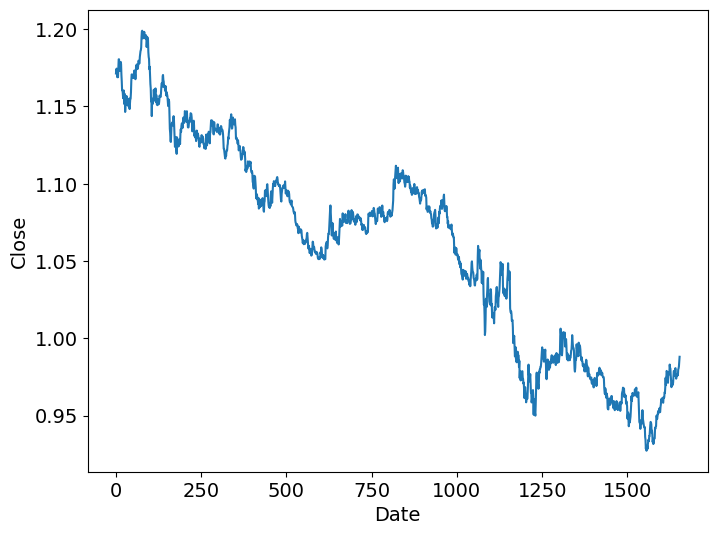

In [ ]:
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

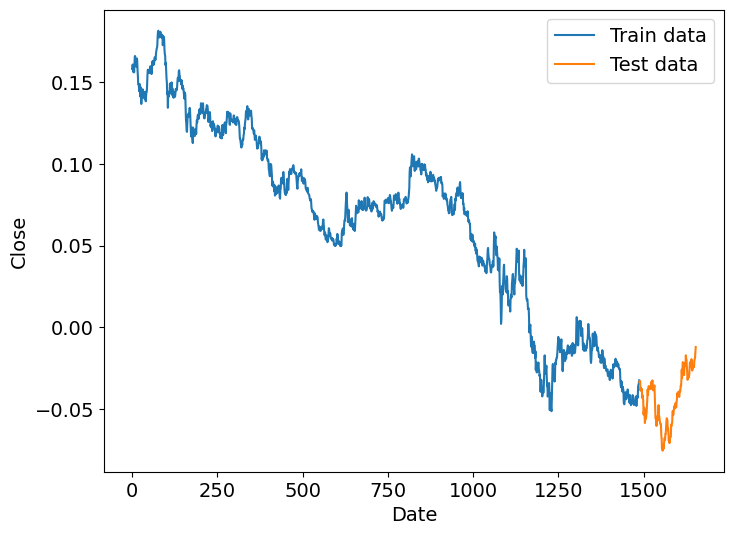

In [ ]:
df_close = np.log(df['Close'])

train_data, test_data = df_close[0:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train_data, label='Train data')
plt.plot(test_data, label='Test data')
plt.legend()
plt.show()

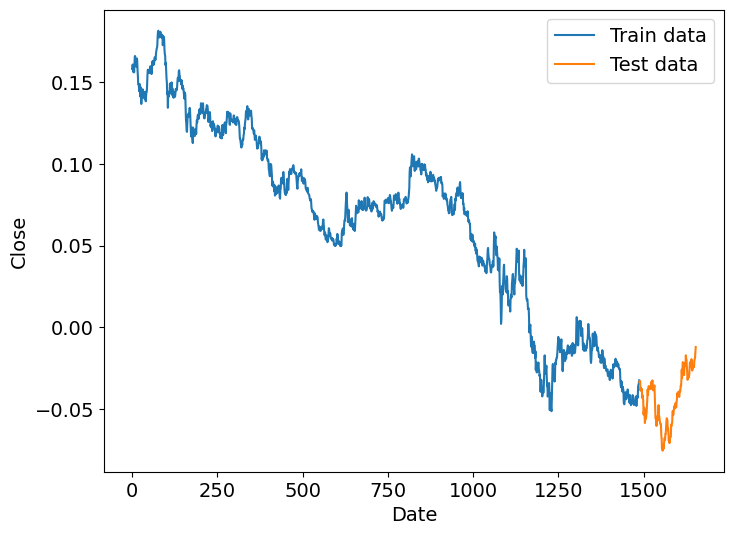

In [ ]:
df_close = np.log(df['Close'])

train_data, test_data = df_close[0:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train_data, label='Train data')
plt.plot(test_data, label='Test data')
plt.legend()
plt.show()

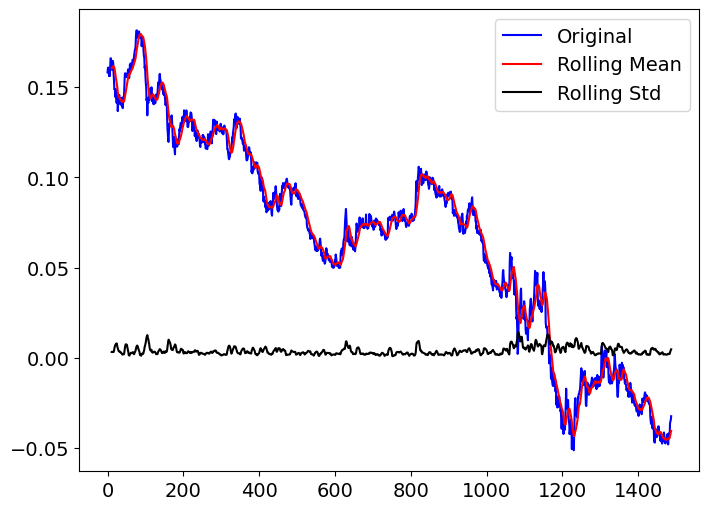

In [ ]:
rolmean = train_data.rolling(window=12).mean()
rolstd = train_data.rolling(window=12).std()
plt.plot(train_data, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

# Kiểm tra dữ liệu vựa trên seasonal

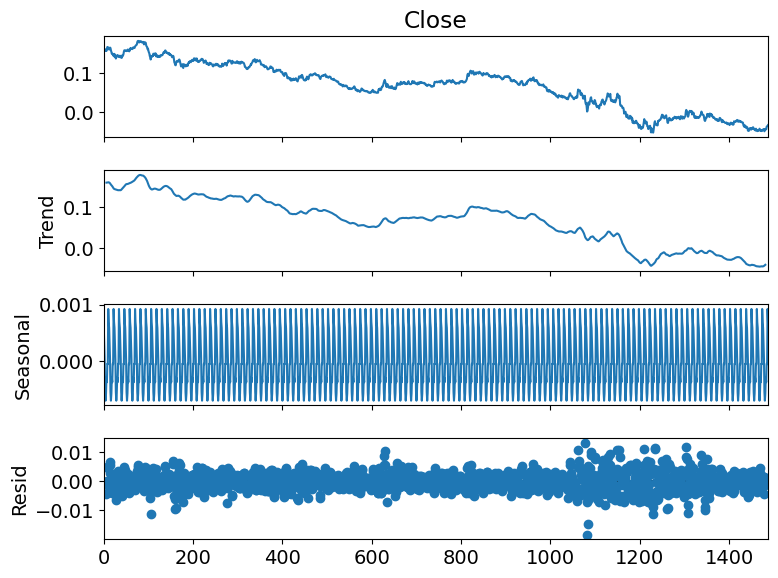

In [ ]:
decompose_result = seasonal_decompose(train_data, model='additive', period=12)
decompose_result.plot()
plt.show()

In [ ]:
print(adf_test(train_data))
print("----------------")

Fail to reject the null hypothesis (H0), 
the data is non-stationary
ADF : Test statistc         NaN
p value                     NaN
# of Lag                    NaN
# of Observations           NaN
Critical value(1%)    -3.434776
Critical value(5%)    -2.863495
Critical value(10%)   -2.567811
dtype: float64
----------------


In [ ]:
print(kpss_test(train_data))
print("----------------")

Reject the null hypothesis (H0), 
the data is stationary
KPSS: Test statistic     5.015631
p value                  0.010000
# of lag                25.000000
Critical value(10%)      0.347000
Critical value(5%)       0.463000
Critical value(2.5%)     0.574000
Critical value(1%)       0.739000
dtype: float64
----------------


# Dữ liệu có tính dừng

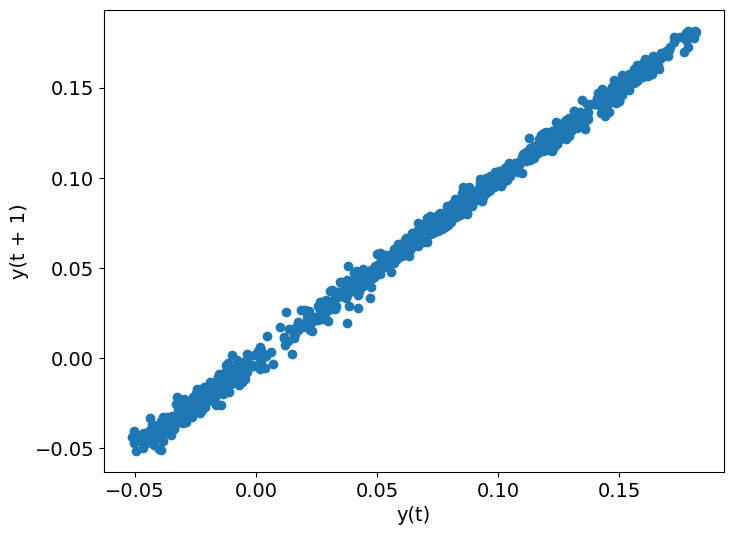

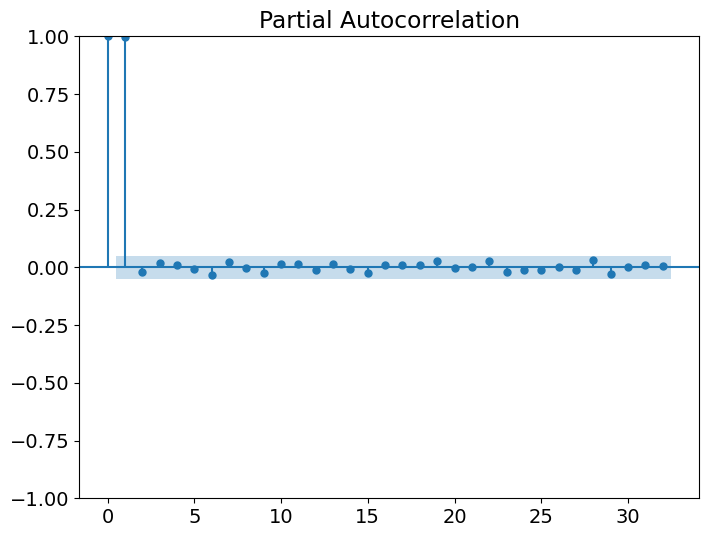

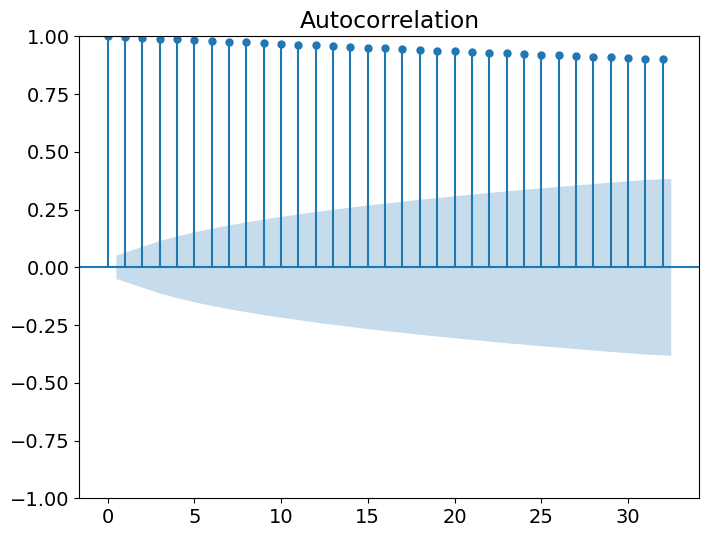

In [ ]:
pd.plotting.lag_plot(train_data)
plt.show()
plot_pacf(train_data)
plt.show()
plot_acf(train_data)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12945.924, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12948.040, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12946.365, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12946.400, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12947.513, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12944.095, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.681 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1488
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6476.020
Date:                Fri, 18 Oct 2024   AIC                         -12948.040
Time:                        08:07:19   BIC                         -12937.431
Sample:                             0   HQIC                        -12944.08

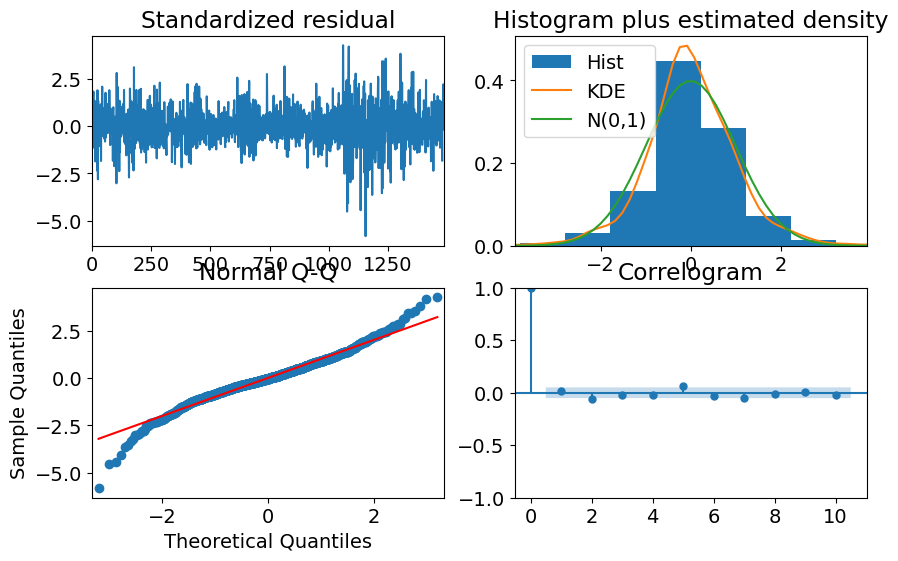

In [ ]:
stepwise_fit = auto_arima(train_data, suppress_warnings=True, trace = True)
print(stepwise_fit.summary())
stepwise_fit.plot_diagnostics(figsize = (10,6))
plt.show()

In [ ]:
model =  ARIMA(train_data, order=(1,1,2), trend = "t")
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1488
Model:                 ARIMA(1, 1, 2)   Log Likelihood                6478.938
Date:                Fri, 18 Oct 2024   AIC                         -12947.876
Time:                        08:07:24   BIC                         -12921.354
Sample:                             0   HQIC                        -12937.992
                               - 1488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001   7.68e-05     -1.668      0.095      -0.000    2.24e-05
ar.L1          0.1381      0.357      0.387      0.699      -0.561       0.837
ma.L1         -0.1220      0.357     -0.342      0.7

In [ ]:
fc = model_fit.get_forecast(len(test_data))
fc_values = fc.predicted_mean
fc_values.index = test_data.index
coef = fc.conf_int(alpha = 0.05)
lower_series = coef["lower Close"]
upper_series = coef["upper Close"]
lower_series_index = coef["lower Close"].index
upper_series_index = coef["upper Close"].index

mse = mean_squared_error(test_data, fc_values)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

0.0003724848040859275
0.019299865390357714


0.11153125981719182


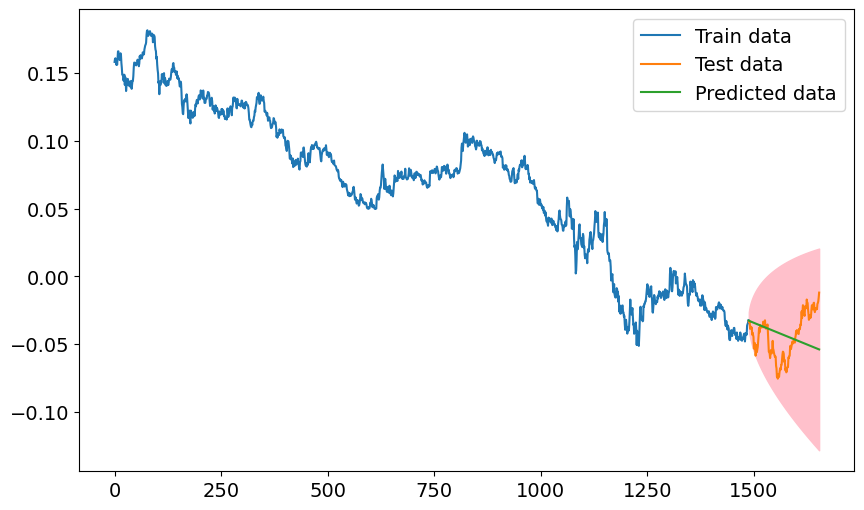

In [ ]:
baseline_pred = np.full(len(test_data), train_data.mean())
baseline_rmse = np.sqrt(mean_squared_error(test_data, baseline_pred))
print(baseline_rmse)

plt.figure(figsize=(10,6), dpi = 100)
plt.plot(train_data, label = "Train data")
plt.plot(test_data, label = "Test data")
plt.plot(fc_values, label = "Predicted data")
plt.fill_between(lower_series_index, lower_series, upper_series, color = "pink")
plt.legend()
plt.show()

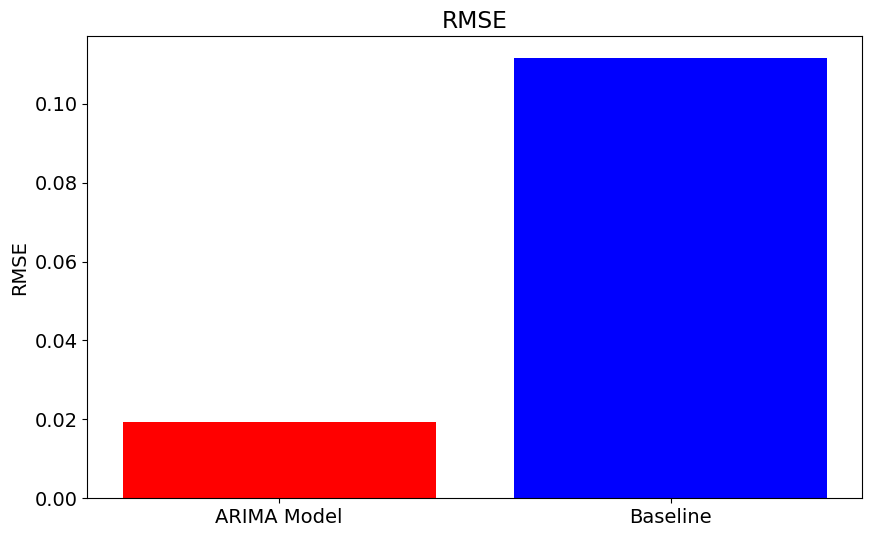

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
plt.bar(["ARIMA Model", "Baseline"], [rmse, baseline_rmse], color = ["red", "blue"])
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()

In [ ]:
print("arima model rmse {: 2f}".format(rmse))
print("baseline model rmse {: 2f}".format(baseline_rmse))


arima model rmse  0.019300
baseline model rmse  0.111531


# Expanding Window

In [ ]:
df_new = df[["time", "Close"]]

In [ ]:
print(df_new.head())
df_new.tail()

         time    Close
0  2018-01-02  1.17135
1  2018-01-03  1.17384
2  2018-01-04  1.17450
3  2018-01-05  1.17258
4  2018-01-08  1.16895


,time,Close
1649,2024-05-13,0.97987
1650,2024-05-14,0.98058
1651,2024-05-15,0.98184
1652,2024-05-16,0.98459
1653,2024-05-17,0.98811


In [ ]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# Giả sử df_new là DataFrame đã có
df_new['time'] = pd.to_datetime(df_new['time'])

# Đặt 'time' làm index
df_new.set_index('time', inplace=True)

mse_list = []
test_years = []

# Áp dụng Expanding Window và chia tập test là 1 năm (12 tháng)
train_start = '2018-01-01'
test_window_size = pd.DateOffset(years=1)

for test_start in pd.date_range('2019-01-01', '2023-01-01', freq='YS'):
    train = df_new.loc[train_start:test_start - pd.Timedelta(days=1)]  # Lấy từ đầu đến trước năm test
    test = df_new.loc[test_start:test_start + test_window_size - pd.Timedelta(days=1)]  # Lấy dữ liệu của năm tiếp theo

    print(f'Training data until {test_start-pd.Timedelta(days=1)}:')
 # Hiển thị vài dòng đầu tiên của train

    print(f'\nTesting data from {test_start} to {test_start + test_window_size - pd.Timedelta(days=1)}:')
   # Hiển thị vài dòng đầu tiên của test
    print('-' * 50)

    # Huấn luyện mô hình ARIMA trên tập train
    model = ARIMA(train['Close'], order=(5, 1, 0))  # Thay đổi order nếu cần thiết
    model_fit = model.fit()

    # Dự đoán trên tập test
    predictions = model_fit.forecast(steps=len(test))

    # Tính lỗi MSE
    mse = mean_squared_error(test['Close'], predictions)
    print(f'MSE for test period starting from {test_start}: {mse}')
    mse_list.append(mse)
    test_years.append(test_start.year)




Training data until 2018-12-31 00:00:00:

Testing data from 2019-01-01 00:00:00 to 2019-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2019-01-01 00:00:00: 0.0005098648251565881
Training data until 2019-12-31 00:00:00:

Testing data from 2020-01-01 00:00:00 to 2020-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2020-01-01 00:00:00: 0.000316140418653291
Training data until 2020-12-31 00:00:00:

Testing data from 2021-01-01 00:00:00 to 2021-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2021-01-01 00:00:00: 0.0003789757839700835
Training data until 2021-12-31 00:00:00:

Testing data from 2022-01-01 00:00:00 to 2022-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2022-01-01 00:00:00: 0.001931170755210698
Training data until 2022-12-31 00:00:00:

Testing data from 2023-01-01 00:

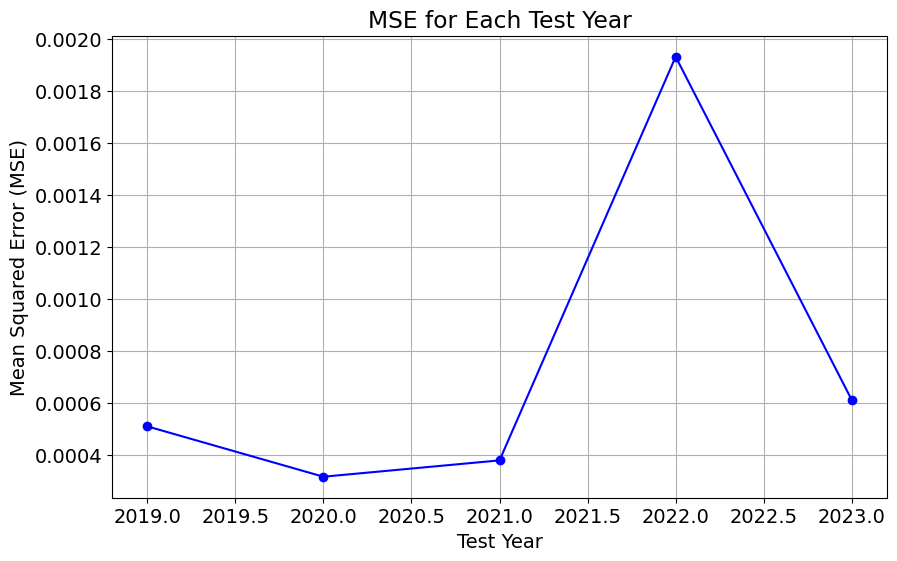

In [ ]:
# Vẽ biểu đồ MSE cho từng năm test
plt.figure(figsize=(10, 6))
plt.plot(test_years, mse_list, marker='o', linestyle='-', color='b')
plt.title('MSE for Each Test Year')
plt.xlabel('Test Year')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Rolling Window

Training data from 2018-01-01 00:00:00 to 2020-12-31 00:00:00:

Testing data from 2021-01-01 00:00:00 to 2021-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2021-01-01 00:00:00: 0.0003789757839700835
--------------------------------------------------
Training data from 2019-01-01 00:00:00 to 2021-12-31 00:00:00:

Testing data from 2022-01-01 00:00:00 to 2022-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2022-01-01 00:00:00: 0.0019339599498340702
--------------------------------------------------
Training data from 2020-01-01 00:00:00 to 2022-12-31 00:00:00:

Testing data from 2023-01-01 00:00:00 to 2023-12-31 00:00:00:
--------------------------------------------------
MSE for test period starting from 2023-01-01 00:00:00: 0.0006059366304870257
--------------------------------------------------


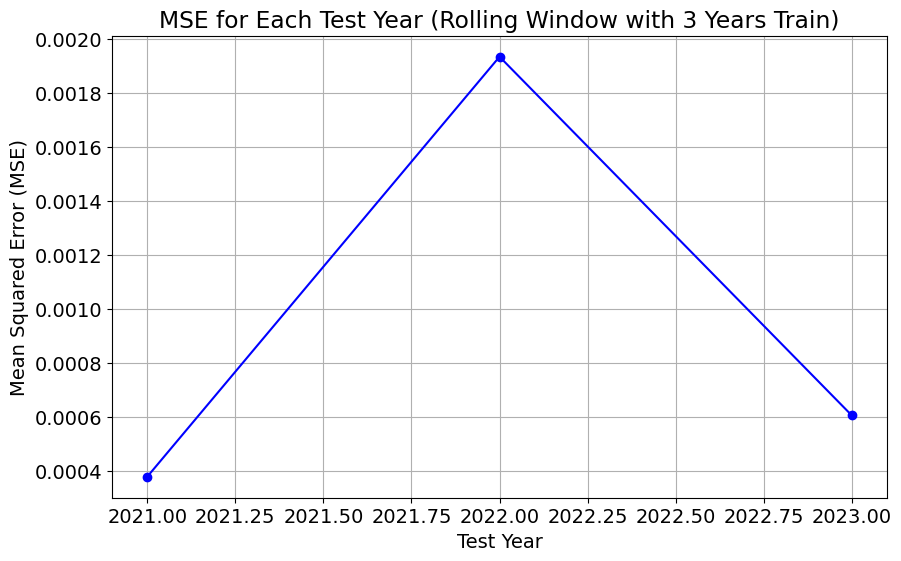

In [ ]:
# Rolling Window với 3 năm train và 1 năm test
train_window_size = pd.DateOffset(years=3)
test_window_size = pd.DateOffset(years=1)

mse_list = []
test_years = []

for test_start in pd.date_range('2021-01-01', '2023-01-01', freq='YS'):
    train_start = test_start - train_window_size  # Lấy 3 năm trước đó làm train
    train = df_new.loc[train_start:test_start - pd.Timedelta(days=1)]  # Lấy dữ liệu train
    test = df_new.loc[test_start:test_start + test_window_size - pd.Timedelta(days=1)]  # Lấy dữ liệu test (1 năm tiếp theo)

    print(f'Training data from {train_start} to {test_start-pd.Timedelta(days=1)}:')

    print(f'\nTesting data from {test_start} to {test_start + test_window_size - pd.Timedelta(days=1)}:')
    print('-' * 50)

    # Huấn luyện mô hình ARIMA trên tập train
    model = ARIMA(train['Close'], order=(5, 1, 0))  # Thay đổi order nếu cần thiết
    model_fit = model.fit()

    # Dự đoán trên tập test
    predictions = model_fit.forecast(steps=len(test))

    # Tính lỗi MSE
    mse = mean_squared_error(test['Close'], predictions)
    mse_list.append(mse)
    test_years.append(test_start.year)

    print(f'MSE for test period starting from {test_start}: {mse}')
    print('-' * 50)

# Vẽ biểu đồ MSE cho từng năm test
plt.figure(figsize=(10, 6))
plt.plot(test_years, mse_list, marker='o', linestyle='-', color='b')
plt.title('MSE for Each Test Year (Rolling Window with 3 Years Train)')
plt.xlabel('Test Year')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


# Holt- Winter

MSE for test period: 0.0002183154005586484


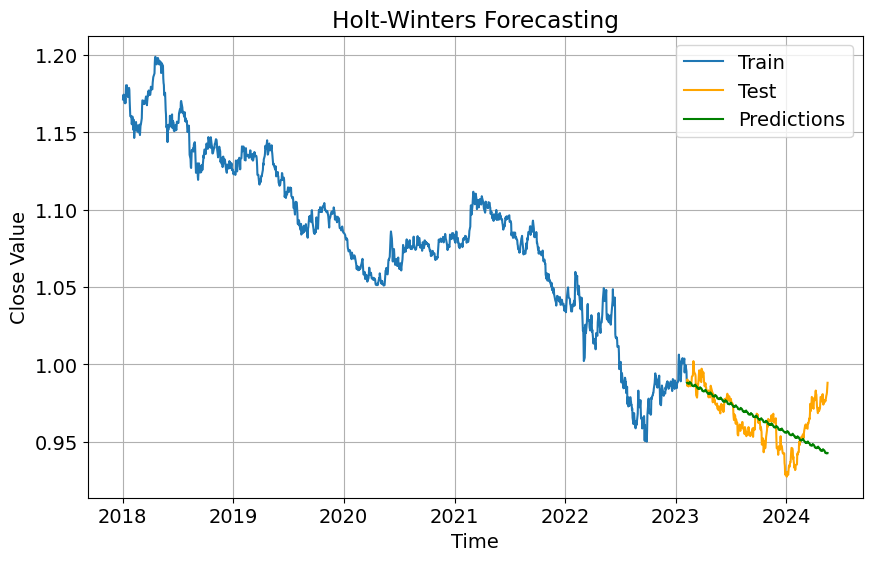

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chia dữ liệu thành train và test không cần rolling window hay expanding window
train_size = int(len(df_new) * 0.8)  # Sử dụng 80% dữ liệu cho train
train = df_new.iloc[:train_size]  # Dữ liệu train
test = df_new.iloc[train_size:]  # Dữ liệu test

# Huấn luyện mô hình Holt-Winters (Triple Exponential Smoothing) trên tập train
model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Dự đoán trên tập test
predictions = model_fit.forecast(steps=len(test))

# Tính lỗi MSE
mse = mean_squared_error(test['Close'], predictions)
print(f'MSE for test period: {mse}')

# Vẽ biểu đồ so sánh dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()
